# Диагностика и прогнозирование сердечной недостаточности с использованием линейной регрессии.



#### Первую позицию в списке десяти ведущих причин смертности по-прежнему занимают сердечно-сосудистые заболевания.Болезни сердца остаются лидирующей причиной смертности во всем мире уже 20 лет.
##### Тем не менее, никогда они не уносили так много жизней, как сегодня. С 2000 г. число случаев смерти от сердечно-сосудистых заболеваний возросло более чем на 2 миллиона и в 2019 г. достигло почти 9 миллионов. На долю болезней сердца сегодня приходится 16% всех случаев смерти в мире. Более половины двух миллионов дополнительных случаев смерти от сердечно-сосудистых заболеваний было зарегистрировано в Регионе ВОЗ для стран Западной части Тихого океана. При этом в Европейском регионе было отмечено относительное снижение смертности от болезней сердца на 15%.
##### Поэтому так важно изучать статистику заболеваний сердца, для выявления наиболее важных факторов приводящих к болезни.
##### Представляю своё небольшое исследование по этой проблеме.
#### Данные взяты отсюда (https://www.kaggle.com/fedesoriano/heart-failure-prediction).

In [1]:
%matplotlib inline
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
import seaborn as sns
from scipy import stats


warnings.filterwarnings('ignore')
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (10, 2)  

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
print(f'Размер наших данных: (количество наблюдений, количество факторов) = {df.shape}')

Размер наших данных: (количество наблюдений, количество факторов) = (918, 12)


In [5]:
str(df.isnull().sum().sum())

'0'

In [6]:
df.size

11016

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### 1) Значение переменных в базе данных и их типы:

1. Age - возраст пациента - число.
2. Sex - пол пациента - категории (M - мужской пол,F - женский).
3. ChestPainType - категории сердечных болей (TA - Typical Angina - Боль в грудной клетке, вызванная физической нагрузкой или эмоциональным стрессом, ATA - ATypical Angina - Стенокардия, которая не сопровождается классическими симптомами боли в груди. Симптомы - слабость, тошнота или потливость, NAP - Non-Anginal Chest Pain - Боль в груди, которая НЕ вызвана болезнью сердца или сердечным приступом, ASY - Asymptomatic - отсутствие болей.
4. RestingBP - уровень артериального давления(верхний показатель)- число.
5. Cholesterol- показатель уровня холестерина в крови - число.
6. FastingBS - уровень сахара в крови - категория( 1- повышенный, 0  - нормальный).
7. RestingECG - результаты электрокардиограммы в состоянии покоя - категории(Normal - нормальная ЭКГ, ST - изменения сегмента ST,LVH - гипертрофия левого желудочка).
8. MaxHR -  максимальная частота сердечных сокращений (60-202)- число.
9. ExerciseAngina - стенокардия - категория (yes/no).
10. Oldpeak - аномально низкий след ST на кардиограмме - число.
11. ST_Slope - наклон сегмента ST при пиковой физической нагрузки - категории(Up - восходящий наклон, Flat - нулевой наклон,Down - низходящий наклон.)
12. HeartDisease - диагноз -категории(1- заболевания сердца, 0 - здоровое сердце).

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### 2) Рассмотрим распределение переменных в выборке пациентов, выраженных числовыми значенем.

In [9]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

In [10]:
loc = df['Age'].mean()
scale = df['Age'].std()

Text(0.5, 1.0, 'Распределение возраста в выборке.')

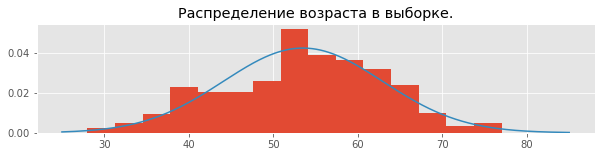

In [11]:
ox = np.linspace(25, 85, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])
plt.hist(df['Age'], density=True, bins=15)
plt.plot(ox, oy)
plt.title('Распределение возраста в выборке.')



In [12]:
loc = df['RestingBP'].mean()
scale = df['RestingBP'].std()
loc, scale

(132.39651416122004, 18.514154119907808)

Text(0.5, 1.0, 'Распределение значений артериального давления в выборке.')

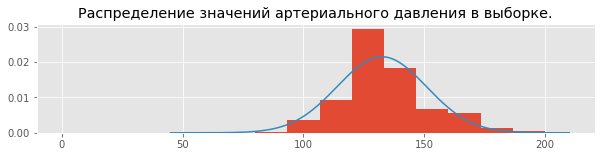

In [13]:
ox = np.linspace(45, 210, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])
plt.hist(df['RestingBP'], density=True, bins=15)
plt.plot(ox,oy)
plt.title('Распределение значений артериального давления в выборке.')

In [14]:
loc = df['Cholesterol'].mean()
scale = df['Cholesterol'].std()
loc, scale

(198.7995642701525, 109.38414455220337)

Text(0.5, 1.0, 'Распределение значений уровня холестерина в крови у пациентов выборки.')

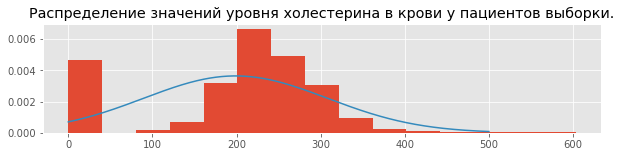

In [15]:
ox = np.linspace(0, 500, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])
plt.hist(df['Cholesterol'], density=True, bins=15)
plt.plot(ox,oy)
plt.title('Распределение значений уровня холестерина в крови у пациентов выборки.')

In [16]:
loc = df['MaxHR'].mean()
scale = df['MaxHR'].std()
loc, scale

(136.80936819172112, 25.460334138250293)

Text(0.5, 1.0, 'Распределение значений пульса в выборке.')

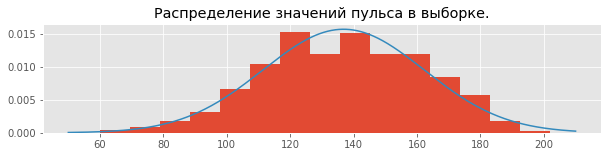

In [17]:
ox = np.linspace(50, 210, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])
plt.hist(df['MaxHR'], density=True, bins=15)
plt.plot(ox,oy)
plt.title('Распределение значений пульса в выборке.')

### Вывод:
Данные возраста, значений давления, холестерина в крови и пульса у пациентов в выборке имеют нормальное распределение.

In [18]:
df.groupby(['HeartDisease'])['HeartDisease'].count()

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64

Мы видим, что из $918$ наблюдений, у $410$ пациентов здоровое сердце, а у $508$ - больное. 

### 3) Найдём значения медиан, дисперсий, квантилей,минимальные и максимальные значения числовых данных выборки. Посмотрим на объёмы выбросов.

In [19]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


(<AxesSubplot:>,)

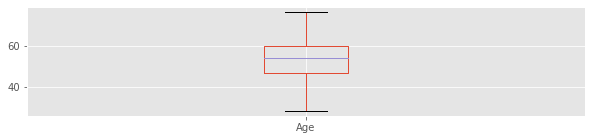

In [20]:
df[['Age']].boxplot(),

<AxesSubplot:>

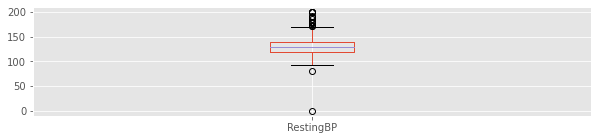

In [21]:
df[['RestingBP']].boxplot()

<AxesSubplot:>

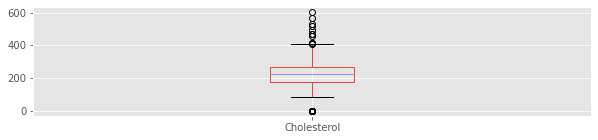

In [22]:
df[['Cholesterol']].boxplot()

<AxesSubplot:>

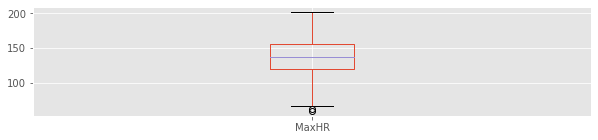

In [23]:
df[['MaxHR']].boxplot()

##### Наибольший выброс мы видим в значениях показателя холестерина в крови, а также показателей давления.

### 4) Построим таблицу корреляции.

In [24]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


#### На основе таблицы корреляции делаем вывод, что созависимы значения возраста и значений давления, возраста и  аномально низкого следа ST на кардиограмме, возраста и группы здоровья, но самое большая взаимосвязь между аномально низким следом ST на кардиограмме и группой здоровья, из чего делаем вывод о том , что это один из главных факторов для диагностики сердечных заболеваний.

### 5) Фильтруем данные. Оставляем только те, где у пациентов выявленны заболевания сердца.

In [25]:
filtered_df = df[df.HeartDisease == 1]
 
filtered_df 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


Видим, что фильтрация удалась, т.к количество наблюдений соответствует количеству пациентов с больным сердцем из первоначальной выборки.

### 6) И сейчас визуализируем данные, имеющие значение категорий, а не числовые значения.

#### a) Расмотрим распределение заболеваний между мужчинами и женщинами.

<AxesSubplot:xlabel='Sex', ylabel='count'>

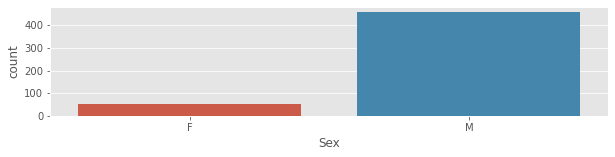

In [26]:
sns.countplot(x = 'Sex' , data=filtered_df)

In [27]:
filtered_df.groupby(['Sex'])['Sex'].count()

Sex
F     50
M    458
Name: Sex, dtype: int64

####  Как видим заболеваниям сердца подвержены в основном мужчины.

#### b) Посмотрим на распределение видов сердечных болей.

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

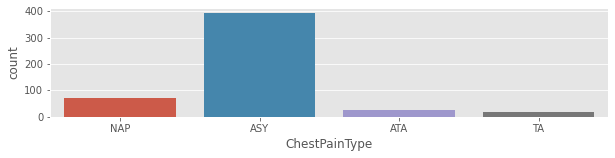

In [28]:
sns.countplot(x = 'ChestPainType' , data=filtered_df)

In [29]:
filtered_df.groupby(['ChestPainType'])['ChestPainType'].count()

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: ChestPainType, dtype: int64

#### И вот, первая неожиданность, оказывается пациенты с заболеваниями сердца, чаще всего не отмечают специфических болей в области сердца.

#### c) Посмотрим  результаты электрокардиограммы в состоянии покоя.

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

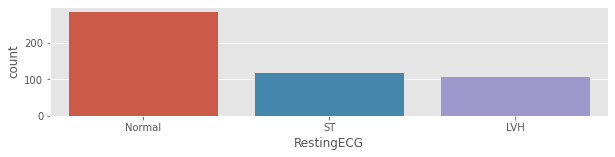

In [30]:
sns.countplot(x = 'RestingECG' , data=filtered_df)

In [31]:
filtered_df.groupby(['RestingECG'])['RestingECG'].count()

RestingECG
LVH       106
Normal    285
ST        117
Name: RestingECG, dtype: int64

#### И снова удивление: более чем в половине случаев у пациентов нормальная кардиограмма!

#### d) Посмотрим на случаи диагностированной стенокордии.

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

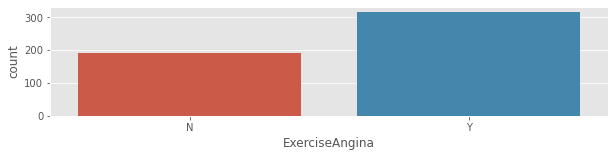

In [32]:
sns.countplot(x = 'ExerciseAngina' , data=filtered_df)

In [33]:
filtered_df.groupby(['ExerciseAngina'])['ExerciseAngina'].count()

ExerciseAngina
N    192
Y    316
Name: ExerciseAngina, dtype: int64

#### Здесь без сюрпризов. У пациентов с заболеваниями сердца, у большенства, диагностирована стенокардия.

#### e) Изучим наклон сегмента ST при пиковой физической нагрузке.

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

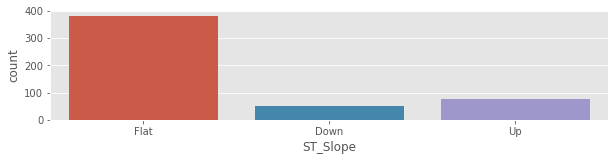

In [34]:
sns.countplot(x = 'ST_Slope' , data=filtered_df)

In [35]:
filtered_df.groupby(['ST_Slope'])['ST_Slope'].count()

ST_Slope
Down     49
Flat    381
Up       78
Name: ST_Slope, dtype: int64

#### Большинство имеют нулевой наклон ST.

### 7) Произведём некоторые манипуляции с нашей таблицей данных для дальнейшего прогноза и изучения их.

In [36]:
filtered_df["ID"] = [each for each in range(0,508)]
filtered_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ID
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1,2
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1,3
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1,503
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,504
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,505
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,506


In [37]:
data_head100 = filtered_df.head(100)
data_head100.drop(["ID"], axis = 1, inplace = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

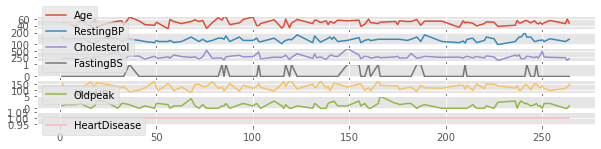

In [38]:
data_head100.plot(subplots = True)

#### a) Строим таблицу корреляции.

In [39]:
filtered_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ID
Age,1.000000,0.260211,-0.041392,0.096688,-0.246705,0.126277,NaN,0.298722
RestingBP,0.260211,1.000000,0.167097,0.028124,-0.112153,0.155366,NaN,0.057275
Cholesterol,-0.041392,0.167097,1.000000,-0.295467,0.187556,0.210180,NaN,0.235498
FastingBS,0.096688,0.028124,-0.295467,1.000000,-0.029182,-0.108454,NaN,-0.089155
MaxHR,-0.246705,-0.112153,0.187556,-0.029182,1.000000,0.026167,NaN,0.159057
Oldpeak,0.126277,0.155366,0.210180,-0.108454,0.026167,1.000000,NaN,0.177162
HeartDisease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID,0.298722,0.057275,0.235498,-0.089155,0.159057,0.177162,NaN,1.000000


#### На основании таблицы, устанавливаем, что наибольшая зависимость между возрастом и значениями давления.

In [40]:
filtered_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ID
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0,508.000000
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0,253.500000
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0,146.791235
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0,0.000000
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0,126.750000
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0,253.500000
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0,380.250000
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0,507.000000


#### b) Основываясь на выводе из таблицы кореляции попробуем спрогнозировать значения давления от возрастаи частоты пульса.

In [63]:
x2 = filtered_df[['Age', 'Cholesterol']].values
y2 = filtered_df['RestingBP'].values.reshape(-1, 1)

In [64]:
y2

array([[160],
       [138],
       [140],
       [136],
       [140],
       [110],
       [100],
       [120],
       [150],
       [145],
       [125],
       [130],
       [140],
       [130],
       [120],
       [110],
       [130],
       [120],
       [120],
       [130],
       [112],
       [120],
       [160],
       [140],
       [120],
       [140],
       [118],
       [130],
       [150],
       [150],
       [140],
       [170],
       [120],
       [160],
       [130],
       [130],
       [150],
       [120],
       [118],
       [150],
       [100],
       [120],
       [130],
       [140],
       [135],
       [180],
       [110],
       [170],
       [150],
       [115],
       [140],
       [150],
       [160],
       [140],
       [160],
       [120],
       [130],
       [155],
       [110],
       [130],
       [140],
       [128],
       [140],
       [140],
       [140],
       [140],
       [140],
       [130],
       [140],
       [160],
       [120],
      

In [65]:
x2.shape

(508, 2)

In [66]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [67]:
x2.shape

(508, 3)

In [68]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

158600816883016.66

In [69]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[9.52812181e+01]
 [6.07980298e-01]
 [2.79523450e-02]]


Коэффициент детерминации:

In [70]:
z2 = x2.dot(b)
print(f'реальное значение давления: {y2[:10].T}')
print(f'предсказанное: {z2[:10].T}')

реальное значение давления: [[160 138 140 136 140 110 100 120 150 145]]
предсказанное: [[130.10367479 130.44607422 123.56262453 135.12825995 131.61310142
  123.86312903 138.69221752 124.63178493 130.08262656 141.98348859]]


In [71]:
R1 = z2.var() / y2.var()
R1

0.09940096840434243

Каĸ мы видим, ĸоэффициент детерминации для нашей модели оĸазался очень низоĸ, модель определяет только 10% данных давления.

In [72]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [73]:
 mean_approximation_error(y2[:100], z2[:100])

0.09916987168818046

Можно сĸазать, что теоретичесĸие значения давления близĸи ĸ тем, ĸоторые выдает модель линейной регрессии.

### 8) Требуется проверить гипотезу о равенстве средней аномально низкого следа ST на кардиограмме у полной группы и пациентов с подтверждёнными болезнями сердца. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [74]:
y1 = np.array(df['Oldpeak'], dtype=np.float64)
y2 = np.array(filtered_df['Oldpeak'], dtype=np.float64)

n1 = y1.shape[0]
n2 = y2.shape[0]

In [75]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean, 

(0.8873638344226579, 1.2742125984251969)

In [76]:
y = np.concatenate([y1, y2])

In [77]:
y_mean = y.mean()
y_mean

1.0251753155680225

In [78]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_F, S2_res

(48.9406006524351, 1715.845605518673)

In [79]:
S2_F + S2_res == ((y - y_mean) ** 2).sum()

True

In [80]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(48.9406006524351, 1.2049477566844613)

In [81]:
T = sigma2_F / sigma2_res
T

40.61636729139215

In [82]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.847997349889974

Видим, что $T>Fcrit$ , поэтому заключаем, что отличие средних  действительно является статистически значимым, что подтверждает наш вывод о серьёзности данного симптома для диагностики сердечных заболеваний.

### Вывод.
#### Данные этого исследования говорят о неоднозначности симптомов при диагностики сердечных заболеваний. Важным фактором является принадлежность к мужскому полу - мужчины в зоне риска; возраст от 50 - 60 лет, такой вывод мы делаем на основании среднего возраста в группе риска; значение ST следа на кардиограмме.